In [1]:
import time
from functools import partial

import elfi
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from elfi.examples.ricker import stochastic_ricker, num_zeros, chi_squared

import logging
logging.basicConfig(level=logging.INFO)  # sometimes this is required to enable logging inside Jupyter

%matplotlib inline
%precision 2

# Set an arbitrary seed and a global random state to keep the randomly generated quantities the same between runs
seed = 20180620
np.random.seed(seed)
N = 1000
n_obs = 50
random_state = np.random.RandomState(seed)
size = 10

In [2]:
simulator = partial(stochastic_ricker, n_obs=n_obs)
true_params = [3.8, 0.3, 10.]

m = elfi.ElfiModel()
y_obs = simulator(*true_params, n_obs=n_obs, random_state=random_state)
sim_fn = partial(simulator, n_obs=n_obs)
sumstats = []

In [3]:
elfi.Prior(ss.expon, [np.e, np.e], 2, size=size, model=m, name='t1')
# elfi.Prior(ss.multivariate_normal, [np.e, np.e], 2, size=10, model=m, name='t1')

Prior(name='t1', 'expon')

In [4]:
# class CustomPrior_t1(elfi.Distribution):
#     def rvs(b, size=1, random_state=None):
#         # u = scipy.stats.uniform.rvs(loc=0, scale=1, size=size, random_state=random_state)
#         u = ss.expon.rvs([np.e, np.e], 2, size=size, random_state=random_state)
#         t1 = np.where(u < 0.5, np.sqrt(2.*u)*b - b, -np.sqrt(2.*(1.-u))*b + b)
#         return t1

In [5]:
# elfi.Prior(CustomPrior_t1.rvs, 2)
# m['t1'].become(elfi.Prior(CustomPrior_t1, 2))

In [6]:
elfi.Prior(ss.truncnorm, 0, 5, model=m, name='t2')
elfi.Prior(ss.uniform, 0, 100, model=m, name='t3')

Prior(name='t3', 'uniform')

In [7]:
elfi.Simulator(sim_fn, m['t1'], m['t2'], m['t3'], observed=y_obs, name='Ricker')
sumstats.append(elfi.Summary(partial(np.mean, axis=1), m['Ricker'], name='Mean'))
sumstats.append(elfi.Summary(partial(np.var, axis=1), m['Ricker'], name='Var'))
sumstats.append(elfi.Summary(num_zeros, m['Ricker'], name='#0'))
elfi.Discrepancy(chi_squared, *sumstats, name='d')

Discrepancy(name='d')

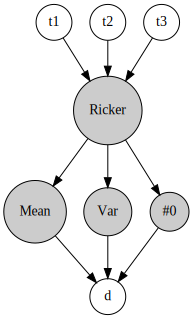

In [8]:
elfi.draw(m['d'])

In [9]:
rej = elfi.Rejection(m['d'], batch_size=N, seed=seed)

In [10]:
res = rej.sample(N)

ValueError: In executing node 't1': size does not match the broadcast shape of the parameters..

In [ ]:
res.summary()

In [ ]:
res.plot_marginals()

In [ ]:
res.plot_pairs()